# **Libraries Setting**

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import math
import csv
import tqdm
import re
import os

from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
from transformers import BertConfig
from transformers import BertModel
from transformers import *
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy import stats
from os import path
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

!pip install adjustText
from adjustText import adjust_text

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` fr

Mounted at /content/drive


# **LLMs Initialization**

In [ ]:
class ModelWrapper():
    def __init__(self, model_name):
        """
        Initializes the ModelWrapper instance for a specified model name.

        Args:
        - model_name (str): The name or path of the model to load.
        """
        if 'bert' in model_name:
            self.model = BertModel.from_pretrained(model_name, output_hidden_states=True)
            self.tokenizer = BertTokenizer.from_pretrained(model_name)
            self.config = BertConfig.from_pretrained(model_name)
        elif 'gpt2' in model_name:
            self.model = GPT2Model.from_pretrained(model_name)
            self.tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        elif 'distilbert' in model_name:
            self.model = DistilBertModel.from_pretrained(model_name)
            self.tokenizer = DistilBertTokenizer.from_pretrained(model_name)
        elif 't5' in model_name:
            self.model = T5Model.from_pretrained(model_name)
            self.tokenizer = T5Tokenizer.from_pretrained(model_name)
        else:
            raise ValueError(f"Model '{model_name}' not supported.")

bert_base_cased = ModelWrapper('bert-base-cased')
gpt2_model = ModelWrapper('gpt2')
distilbert_model = ModelWrapper('distilbert-base-cased')
t5_model = ModelWrapper('t5-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/model.safetensors
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights 

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu"

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.38.2",
  "use_cach

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/model.safetensors
All model checkpoint weights were used when initializing GPT2Model.

All the weights of GPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GPT2Model for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/config.json
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Model config BertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dim": 768,
  "dropout": 0.1,
  "hidden_act": "gelu",
  "hidden_dim": 3072,
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "n_heads": 12,
  "n_layers": 6,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/model.safetensors
Some weights of the model checkpoint at distilbert-base-cased were not used when initializing BertModel: ['distilbert.embeddings.LayerNorm.bias', 'distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.position_embeddings.weight', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
   

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/model.safetensors
All model checkpoint weights were used when initializing T5Model.

All the weights of T5Model were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use T5Model for predictions without further training.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

loading file spiece.model from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/spiece.model
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/config.json
Model config T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": tr

# **Loading Data**

### `country_sentences.csv`

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/filtered_country_sentences.csv")
data.columns = ['sentence', 'keyword']
data = data.reset_index()
data

,index,sentence,keyword
0,0,"However, it has also been said that observatio...",Singapore
1,1,"Through the 1960s, the network began to expand...",Canada
2,2,Goodall joined the diplomatic service in 1956 ...,Austria
3,3,"Poland obtained almost exactly half of the 1,9...",Poland
4,4,"Shiretoko Peninsula in Hokkaido, Japan.",Japan
...,...,...,...
294,294,IX (B) Squadron Tornado GR4s flew a round trip...,Libya
295,295,"According to Soutphommasane, Australian leftis...",Australia
296,296,"The business trades in the United Kingdom, Fra...",France
297,297,"These pieces readily circulated, and although ...",United States


# **Embedding**

## **Class: BERT**

In [ ]:
class BERTEmbeddingExtractor:
    def __init__(self, model):
        self.model = model.model
        self.tokenizer = model.tokenizer
        self.model.eval()  # Set the model to evaluation mode

    def get_id(self, keyword):
        tokenized_text = self.tokenizer.tokenize("[CLS] " + keyword + " [SEP]")
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)
        return indexed_tokens[1:-1]

    def average_last_4(self, token_embeddings):
        last_4_layers = token_embeddings[:, -4:, :]  # Select the last 4 layers
        token_vecs_cat = torch.mean(last_4_layers, dim=1)
        return token_vecs_cat

    def extract_embeddings(self, text, keyword_ids, average_first_token=False):
        # Common preprocessing for both strategies
        marked_text = "[CLS] " + text + " [SEP]"
        tokenized_text = self.tokenizer.tokenize(marked_text)
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

        segments_ids = [1] * len(tokenized_text)
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])

        with torch.no_grad():
            outputs = self.model(tokens_tensor, segments_tensors)
            hidden_states = outputs[2]

        token_embeddings = torch.stack(hidden_states, dim=0)
        token_embeddings = torch.squeeze(token_embeddings, dim=1).permute(1, 0, 2)
        token_vecs_average_last_4 = self.average_last_4(token_embeddings)

        # Extract word embedding
        try:
            index = next(i for i in range(len(indexed_tokens)) if indexed_tokens[i:i+len(keyword_ids)] == keyword_ids)
        except StopIteration:
            print("Keyword not found in text:", text)
            return None, None

        if average_first_token:
            word_embedding = token_vecs_average_last_4[index]
        else:
            # Corrected part: Direct use of tensor slice without torch.stack
            word_embedding = torch.mean(token_vecs_average_last_4[index:index+len(keyword_ids)], dim=0)

        # Calculate sentence embedding
        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)

        return word_embedding, sentence_embedding

    def run_analysis(self, data, indices, keyword_ids, average_first_token=False):
        word_embeddings, sentence_embeddings, index_numbers = [], [], []
        for n, text in enumerate(data):
            word_embedding, sentence_embedding = self.extract_embeddings(text, keyword_ids, average_first_token)
            if word_embedding is not None:
                word_embeddings.append(word_embedding)
                sentence_embeddings.append(sentence_embedding)
                index_numbers.append(indices[n])
        return word_embeddings, sentence_embeddings, index_numbers

    def create_embeddings(self, filename, data, average_first_token=False):
        with open(filename, 'a', newline='') as f:
            writer = csv.writer(f, delimiter=',')
            for name, group in data.groupby(['keyword']):
                name_match = group['keyword'].values[0]
                keyword_ids = self.get_id(name_match)
                word_embeddings, sentence_embeddings, row_numbers = self.run_analysis(group['sentence'].values, group['index'].values, keyword_ids, average_first_token)
                for word_embedding, sentence_embedding, row_number in zip(word_embeddings, sentence_embeddings, row_numbers):
                    writer.writerow([row_number, name, len(keyword_ids)] + word_embedding.tolist() + sentence_embedding.tolist())
                print("Processed keyword:", name)

In [ ]:
extractor_bert = BERTEmbeddingExtractor(bert_base_cased)
extractor_bert.create_embeddings("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/bert_test.csv", data)

In [ ]:
bert = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/bert_test.csv", header=None)
bert

,0,1,2,3,4,5,6,7,8,9,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538
0,38,Afghanistan,1,0.261377,-0.622178,-0.335946,0.259499,0.406551,0.027273,0.256901,...,-0.139520,0.063259,-0.038316,-0.382184,0.543501,0.409989,0.079613,0.231160,0.163735,-0.093772
1,220,Afghanistan,1,-0.496812,-1.615169,-0.260262,-0.259492,0.257033,0.203263,0.406911,...,-0.076232,0.023639,-0.140857,-0.323302,0.145415,-0.034372,-0.224250,0.324033,-0.211435,0.107211
2,86,Albania,1,0.115115,-0.593330,-0.060152,-0.350154,-0.090545,0.249010,-0.443175,...,-0.110127,0.264968,-0.398034,-0.115952,0.556579,0.160012,-0.017895,0.476567,0.015749,-0.120418
3,56,Algeria,1,0.572502,0.185081,0.171574,0.550636,1.039198,-0.135785,-0.188365,...,-0.159646,0.122107,0.206090,0.265789,0.052063,0.346792,-0.031623,0.734574,0.385981,-0.341294
4,178,Andorra,2,-0.130841,0.864568,0.061555,-0.783801,-0.032425,-0.122064,0.004551,...,-0.710796,0.629353,0.060732,-0.128480,0.227637,0.118412,-0.150966,0.138362,0.159063,0.284863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25,Vietnam,1,0.511885,0.033614,0.003303,-0.182995,0.626140,-0.071056,-0.055598,...,0.031000,-0.172204,-0.426782,-0.051207,-0.102712,0.605640,-0.271448,0.059376,-0.167399,0.037648
296,206,Vietnam,1,1.043633,0.091328,0.001800,0.083105,0.701342,0.067468,0.235749,...,-0.068399,0.436147,0.099812,-0.142230,-0.351526,0.184185,-0.018774,0.627079,0.155842,-0.018687
297,139,Yemen,1,0.264897,-0.546328,-0.229546,-0.046026,-0.024865,0.339112,-0.355968,...,-0.321117,0.267828,-0.410288,-0.322666,0.250757,0.082214,0.508001,-0.113902,0.333439,0.062668
298,174,Zambia,1,0.128440,-0.621436,-0.414051,-0.708553,-0.016326,-0.220231,0.645020,...,-0.320904,0.521541,-0.270200,-0.066257,-0.006730,0.308329,-0.384913,0.284998,-0.276236,-0.191603


## **Class: DistilBERT**

In [ ]:
class DistilBERTEmbeddingExtractor:
    def __init__(self, model_wrapper):
        self.model = model_wrapper.model
        self.tokenizer = model_wrapper.tokenizer
        self.model.eval()  # Set the model to evaluation mode

    def get_id(self, keyword):
        tokenized_text = self.tokenizer.tokenize("[CLS] " + keyword + " [SEP]")
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)
        return indexed_tokens[1:-1]

    def average_last_n(self, token_embeddings, n=2):
        # token_embeddings is the last hidden state with shape [sequence_length, hidden_size]
        # Since for DistilBERT, there's no direct concept of the last N layers in the output,
        # this function will return the embeddings as-is or modify it according to specific needs.
        return token_embeddings  # Directly return the embeddings as the averaging of last N doesn't apply the same way here.


    def extract_embeddings(self, text, keyword_ids, average_first_token=False):
        marked_text = "[CLS] " + text + " [SEP]"
        tokenized_text = self.tokenizer.tokenize(marked_text)
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(tokenized_text)

        segments_ids = [1] * len(tokenized_text)
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])

        with torch.no_grad():
            outputs = self.model(tokens_tensor, segments_tensors)
            hidden_states = outputs[1]  # For DistilBERT, outputs only last hidden state

        # For DistilBERT, use the last hidden state directly
        token_embeddings = hidden_states.unsqueeze(0)
        token_embeddings = token_embeddings.permute(1, 0, 2)
        token_vecs_average_last_n = self.average_last_n(token_embeddings, 2)

        try:
            index = next(i for i in range(len(indexed_tokens)) if indexed_tokens[i:i+len(keyword_ids)] == keyword_ids)
        except StopIteration:
            print("Keyword not found in text:", text)
            return None, None

        if average_first_token:
            word_embedding = token_vecs_average_last_n[index]
        else:
            word_embedding = torch.mean(token_vecs_average_last_n[index:index+len(keyword_ids)], dim=0)

        sentence_embedding = torch.mean(hidden_states, dim=0)

        return word_embedding, sentence_embedding

    def run_analysis(self, data, indices, keyword_ids, average_first_token=False):
        word_embeddings, sentence_embeddings, index_numbers = [], [], []
        for n, text in enumerate(data):
            word_embedding, sentence_embedding = self.extract_embeddings(text, keyword_ids, average_first_token)
            if word_embedding is not None:
                word_embeddings.append(word_embedding)
                sentence_embeddings.append(sentence_embedding)
                index_numbers.append(indices[n])
        return word_embeddings, sentence_embeddings, index_numbers

    def create_embeddings(self, filename, data, average_first_token=False):
        with open(filename, 'a', newline='') as f:
            writer = csv.writer(f, delimiter=',')
            for name, group in data.groupby(['keyword']):
                keyword_ids = self.get_id(name)
                word_embeddings, sentence_embeddings, row_numbers = self.run_analysis(group['sentence'].values, group['index'].values, keyword_ids, average_first_token)
                for word_embedding, sentence_embedding, row_number in zip(word_embeddings, sentence_embeddings, row_numbers):
                    writer.writerow([row_number, name, len(keyword_ids)] + word_embedding.tolist() + sentence_embedding.tolist())
                print("Processed keyword:", name)

In [ ]:
extractor_distillbert = DistilBERTEmbeddingExtractor(distilbert_model)
extractor_distillbert.create_embeddings("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/distillbert_test.csv", data)

In [ ]:
distillbert = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/distillbert_test.csv", header=None)
# distillbert = distillbert.replace(0, bool("nan"))
distillbert.iloc[:, 3] = 0

distillbert

<ipython-input-7-2411566eb33e>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  distillbert.iloc[:, 3] = 0


,0,1,2,3,4,5,6,7,8,9,...,762,763,764,765,766,767,768,769,770,771
0,38,Afghanistan,1,0,-0.736893,-0.398816,-0.400709,-0.438936,-0.142226,0.212110,...,-0.428841,-0.164625,-0.707210,-0.346000,-0.273291,0.180433,-0.246498,0.035381,-0.185703,-0.583819
1,220,Afghanistan,1,0,-0.700012,-0.338968,-0.427935,-0.457758,-0.106270,0.208104,...,-0.257190,-0.099288,-0.665321,-0.176447,-0.119983,0.209356,-0.256570,0.085982,-0.097732,-0.520462
2,86,Albania,1,0,-0.750193,-0.297446,-0.354850,-0.435512,-0.188854,0.256883,...,-0.303321,-0.068705,-0.692136,-0.256659,-0.082645,0.026688,-0.255769,0.078356,-0.185032,-0.515133
3,56,Algeria,1,0,-0.651456,-0.262808,-0.393066,-0.400389,-0.145265,0.090252,...,-0.319210,-0.055473,-0.543560,-0.149304,-0.339444,0.233874,-0.387278,0.040431,-0.231794,-0.591817
4,178,Andorra,2,0,-0.768238,-0.237110,-0.390759,-0.441434,-0.073347,0.227451,...,-0.406660,-0.138198,-0.630705,-0.202122,-0.123141,0.147962,-0.305062,0.124965,-0.259823,-0.641014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,25,Vietnam,1,0,-0.681854,-0.325491,-0.450125,-0.344237,-0.124025,0.252657,...,-0.324641,-0.112742,-0.614432,-0.224212,-0.208705,0.275845,-0.392995,0.030436,-0.134747,-0.543949
296,206,Vietnam,1,0,-0.728053,-0.375414,-0.369784,-0.392073,-0.093848,0.238524,...,-0.372481,-0.155228,-0.660389,-0.366413,-0.106696,0.191659,-0.331233,0.010454,-0.194702,-0.509482
297,139,Yemen,1,0,-0.686413,-0.449414,-0.402080,-0.552881,0.026079,0.304327,...,-0.334816,-0.102555,-0.686866,-0.300740,-0.157139,0.230410,-0.246048,0.026380,-0.103436,-0.560904
298,174,Zambia,1,0,-0.709341,-0.314448,-0.438820,-0.406358,-0.094026,0.355857,...,-0.398095,-0.099094,-0.649159,-0.268664,-0.207490,0.170687,-0.371323,0.075463,-0.151686,-0.551126


## **Class: GPT2**

In [ ]:
class GPT2EmbeddingExtractor:
    def __init__(self, model_name):
        self.tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        self.model = GPT2Model.from_pretrained(model_name, output_hidden_states=True)
        self.model.eval()  # Set the model to evaluation mode

    def extract_embeddings(self, text):
        inputs = self.tokenizer(text, return_tensors="pt")
        with torch.no_grad():
            outputs = self.model(**inputs)
            hidden_states = outputs.hidden_states
        last_layer_embedding = hidden_states[-1]
        all_layers_embedding = torch.stack(hidden_states).mean(dim=0)
        return last_layer_embedding.squeeze(), all_layers_embedding.squeeze()

    def run_analysis(self, data):
        word_embeddings, sentence_embeddings = [], []
        for text in data:
            word_embedding, sentence_embedding = self.extract_embeddings(text)
            word_embeddings.append(word_embedding)
            sentence_embeddings.append(sentence_embedding)
        return word_embeddings, sentence_embeddings

    def create_embeddings(self, filename, data):
        with open(filename, 'a', newline='') as f:
            writer = csv.writer(f, delimiter=',')
            word_embeddings, sentence_embeddings = self.run_analysis(data['sentence'].values)


            for i, (keyword, text) in enumerate(zip(data['keyword'], data['sentence'])):
                word_embedding, sentence_embedding = self.extract_embeddings(text)
                subword_count = len(self.tokenizer.encode(keyword, add_special_tokens=False))

                # Write to CSV; averaging word embeddings for simplicity
                writer.writerow([i, keyword, subword_count] + word_embedding.mean(dim=0).tolist())
            print("Processed and stored embeddings.")

In [ ]:
extractor_gpt2 = GPT2EmbeddingExtractor('gpt2')
extractor_gpt2.create_embeddings("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/gpt2_test.csv", data)

In [ ]:
gpt_res=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/gpt2_test.csv", header=None)
gpt_res

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,768,769,770
0,0,Chile,2,-0.134997,-0.211898,-0.378316,-0.095908,0.106858,-0.012714,3.793188,...,-0.115870,0.019699,-0.131520,0.186119,0.975857,-0.072933,0.319786,-0.069618,-0.300984,-0.132188
1,1,Singapore,2,0.101951,0.117632,-0.731977,0.189202,-0.026293,-0.094917,1.080275,...,0.104778,0.049344,-0.192225,-0.126513,3.214354,-0.199776,0.095417,0.013888,-0.110989,-0.161762
2,2,Canada,1,0.027393,-0.045793,0.376667,0.333518,0.265895,-0.477869,3.069723,...,0.042506,-0.241450,-0.132700,0.242209,0.576770,-0.341303,-0.008488,0.220327,0.035241,-0.113356
3,3,Austria,2,0.236306,0.107856,-0.216831,-0.170492,-0.081830,-0.470909,3.888357,...,0.190009,0.054723,0.524471,0.634047,0.970628,0.161671,-0.230452,-0.020893,0.221398,-0.188568
4,4,Poland,2,-0.086538,0.218640,-0.273514,-0.127300,0.297478,-0.161952,2.128558,...,-0.007682,-0.139204,-0.158636,0.260092,-0.013844,-0.324481,0.032164,-0.091179,0.206657,-0.137774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Libya,2,0.054339,-0.256998,-0.113205,0.247959,-0.002492,0.025745,4.943836,...,0.003183,-0.092235,-0.276369,-0.166223,0.032256,-0.290134,0.295544,0.012795,-0.152712,0.104001
296,296,Australia,1,0.019014,0.153443,-0.480686,-0.094492,-0.027579,-0.090596,2.488620,...,-0.214336,0.249687,-0.410421,0.113438,5.268038,-0.149101,0.212423,-0.097620,-0.119474,0.159357
297,297,France,1,-0.080078,0.240504,-0.460855,-0.065573,0.124798,-0.035145,3.457784,...,-0.200724,0.041759,-0.097240,0.166930,0.680215,-0.201324,-0.257865,0.111007,-0.025709,0.374323
298,298,United States,2,-0.040002,-0.098329,-0.276451,0.158300,0.010129,-0.318890,3.191870,...,0.255760,-0.164794,-0.123186,0.163389,3.004204,0.331381,-0.192246,-0.014357,-0.109287,-0.340912


## **Class: T5**

In [ ]:
class T5EmbeddingExtractor:
    def __init__(self, model):
        self.model = model.model
        self.tokenizer = model.tokenizer
        self.model.eval()  # Set the model to evaluation mode

    def extract_embeddings(self, text, keyword, average_first_token=False):
        input_ids = self.tokenizer.encode(text, return_tensors='pt')

        with torch.no_grad():
            outputs = self.model.encoder(input_ids)
            hidden_states = outputs.last_hidden_state

        sentence_embedding = torch.mean(hidden_states, dim=1)

        tokenized_text = self.tokenizer.tokenize(text)
        keyword_tokens = self.tokenizer.tokenize(keyword)
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(keyword_tokens)
        num_tokens = len(indexed_tokens)  # Adjust if needed based on the token offsets

        try:
            start_index = next(i for i in range(len(tokenized_text)) if tokenized_text[i:i+len(keyword_tokens)] == keyword_tokens)
            end_index = start_index + len(keyword_tokens)
        except StopIteration:
            print("Keyword not found in text:", text)
            return None, None, None  # Now returns None for num_tokens as well

        if average_first_token:
            word_embedding = hidden_states[0][start_index]
        else:
            word_embedding = torch.mean(hidden_states[0, start_index:end_index, :], dim=0)

        return word_embedding, sentence_embedding, num_tokens

    def create_embeddings(self, filename, data, average_first_token=False):
        with open(filename, 'a', newline='') as f:  # 'a' for appending, change to 'w' to overwrite
            writer = csv.writer(f, delimiter=',')
            for name, group in data.groupby('keyword'):
                for index, text in group['sentence'].items():
                    word_embedding, sentence_embedding, num_tokens = self.extract_embeddings(text, name, average_first_token)
                    if word_embedding is not None:
                        # Now includes num_tokens as 'subwords' in the output row
                        writer.writerow([index, name, num_tokens] + word_embedding.tolist() + sentence_embedding.tolist())
                print("Processed keyword:", name)

In [ ]:
extractor_t5 = T5EmbeddingExtractor(t5_model)
extractor_t5.create_embeddings("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/t5_test.csv", data)

In [ ]:
t5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/t5_test.csv", header=None)
t5.iloc[:, -1] = 0
t5

<ipython-input-11-fba56c1748be>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  t5.iloc[:, -1] = 0


,0,1,2,3,4,5,6,7,8,9,...,762,763,764,765,766,767,768,769,770,771
0,38,Afghanistan,1,-0.500090,0.129417,0.121514,0.272021,-0.069812,0.057141,0.181113,...,0.056936,0.036150,0.066288,-0.338717,0.457390,-0.342613,0.074600,-0.168668,0.091169,0
1,220,Afghanistan,1,-0.244450,0.309334,0.096907,0.221568,-0.245889,0.144909,0.303171,...,0.043662,0.038352,0.213170,-0.319092,0.314921,-0.192477,0.049621,0.018530,0.313322,0
2,86,Albania,1,0.354208,-0.314851,0.056919,0.226396,-0.047888,0.385177,0.260821,...,0.212963,-0.146145,-0.113356,-0.146613,0.417496,-0.200351,0.211345,-0.025927,0.158937,0
3,56,Algeria,1,-0.243479,-0.164297,-0.167484,0.224194,-0.573397,0.355051,0.176702,...,0.149904,-0.222951,-0.234507,-0.279834,0.759370,-0.492137,0.315294,-0.233682,0.206308,0
4,178,Andorra,4,0.087302,0.376863,-0.058364,0.014877,-0.066957,0.250548,0.160387,...,-0.000062,-0.232192,0.023741,-0.017065,0.388632,0.004297,-0.063468,-0.011702,-0.064754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,25,Vietnam,1,-0.186682,-0.147267,-0.246946,-0.044446,0.136961,0.070468,0.190552,...,0.018340,0.012055,-0.053770,-0.670038,0.143460,-0.107148,-0.093821,0.639955,-0.437704,0
290,206,Vietnam,1,-0.320824,-0.193189,-0.205413,0.093223,-0.034038,-0.048489,0.226344,...,0.098167,0.034897,0.186337,-0.952251,-0.037265,-0.105557,-0.083612,0.227066,-0.407440,0
291,139,Yemen,1,-0.160728,-0.064324,-0.020999,0.005830,-0.197958,0.400942,0.238114,...,0.264443,-0.016687,0.116517,0.053162,-0.028105,-0.487254,-0.244134,0.129642,-0.180257,0
292,174,Zambia,1,0.318163,0.046774,0.153471,0.238904,-0.198929,0.659587,0.290781,...,0.177716,-0.161659,-0.066367,-0.166925,0.630548,0.103870,-0.370155,-0.024212,-0.138273,0


## **Artificial Embeddings**

In [ ]:
# Load artificial sentences data from CSV
artificial_sentences = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/artificial_context/artifical_data.csv", header=None)
artificial_sentences.columns = ['sentence']

# Load country metadata
country_metadata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/country_metadata/un_countries_meta.csv")

# Create an empty DataFrame to store processed data
processed_data = pd.DataFrame()

# Generate data with country keywords and modified sentences
for country_name in country_metadata['Name'].values:
    temp_data = artificial_sentences.copy()
    temp_data['keyword'] = [country_name] * len(temp_data)
    temp_data['sentence'] = temp_data['sentence'].apply(lambda x: x.replace("COUNTRY", country_name))
    processed_data = processed_data.append(temp_data)

# Reset index of the combined data
processed_data = processed_data.reset_index()

<ipython-input-20-0237bac52578>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_data = processed_data.append(temp_data)
<ipython-input-20-0237bac52578>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_data = processed_data.append(temp_data)
<ipython-input-20-0237bac52578>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_data = processed_data.append(temp_data)
<ipython-input-20-0237bac52578>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processed_data = processed_data.append(temp_data)
<ipython-input-20-0237bac52578>:16: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [ ]:
# Create embeddings using BERT model and save to CSV
bert_output_filename = "/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/embeddings/artificial_embeddings_bert.csv"
# extractor_bert.create_embeddings(bert_output_filename, processed_data)

# **In-Vocabulary**

In [ ]:
# Define the file path
country_metadata_file = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/country_metadata/generalized_country_meta.csv'

# Check if the file exists
if not os.path.exists(country_metadata_file):
    print("File not found:", country_metadata_file)
else:
    # Read the CSV file
    countries_data = pd.read_csv(country_metadata_file)

    # Print information about the countries data
    print("Number of multiword countries:", len(countries_data[countries_data['name'].str.contains(" ")]))
    print("Number of single word countries:", len(countries_data[~countries_data['name'].str.contains(" ")]))
    print("Number of in-vocabulary countries:", len(countries_data[countries_data['subpieces_distilbert'] == 1]))

Number of multiword countries: 34
Number of single word countries: 159
Number of in-vocabulary countries: 134


## BERT norm

In [ ]:
# an example of subpiece tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
tokenizer("Andorra")

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu"

{'input_ids': [101, 1262, 27583, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
# examples of names by subpieces
display(countries_data[countries_data['subpieces_bert'] < 4].groupby('subpieces_bert').mean())
display(countries_data[countries_data['subpieces_bert'] >= 4].mean(axis=0))

<ipython-input-136-c90d1033de13>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(countries_data[countries_data['subpieces_bert'] < 4].groupby('subpieces_bert').mean())


,Same,Match,Year,subpieces_distilbert,subpieces_gpt2,subpieces_t5,gdp,gdp_logged,freq,freq_logged
subpieces_bert,,,,,,,,,,
1,0.925373,1.00000,2019.0,1.0,2.358209,1.447761,430595.970149,11.177523,74881.514925,10.628626
2,0.750000,0.96875,2019.0,2.0,2.625000,2.687500,870701.593750,9.443195,68148.031250,9.419762
3,1.000000,1.00000,2019.0,3.0,3.800000,3.666667,34896.466667,8.339846,8711.000000,8.928281


<ipython-input-136-c90d1033de13>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(countries_data[countries_data['subpieces_bert'] >= 4].mean(axis=0))


Same                        0.750000
Match                       0.666667
Year                     2019.000000
subpieces_bert              5.583333
subpieces_distilbert        5.583333
subpieces_gpt2              5.416667
subpieces_t5                6.000000
gdp                     14980.333333
gdp_logged                  8.169103
freq                     4308.916667
freq_logged                 7.686522
dtype: float64

In [ ]:
for features in [['freq_logged']]:
    Y = countries_data[['subpieces_bert']].values
    X = countries_data[features].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary(xname=['Constant'] + features, yname='Radius'))

                            OLS Regression Results                            
Dep. Variable:                 Radius   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     118.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.95e-22
Time:                        19:41:41   Log-Likelihood:                -272.30
No. Observations:                 193   AIC:                             548.6
Df Residuals:                     191   BIC:                             555.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Constant        7.1702      0.515     13.912      

In [ ]:
# calculate correlation between frequency and gdp
stats.pearsonr(x=countries_data['freq'].values, y=countries_data['gdp'].values)

PearsonRResult(statistic=0.8165015586894565, pvalue=1.9128842744446183e-47)

In [ ]:
def process_embeddings_bert(word_embeddings_df):
    """
    Process word embeddings DataFrame by resetting index, removing sentence embeddings,
    lowercasing names, and creating a 'tokens' column.

    Args:
    - word_embeddings_df (DataFrame): DataFrame containing word embeddings.

    Returns:
    - DataFrame: Processed word embeddings DataFrame.
    """
    # Reset index of the DataFrame
    word_embeddings_df = word_embeddings_df.reset_index()

    # Remove sentence embeddings and keep only token embeddings
    word_embeddings_df = word_embeddings_df[list(range(3, 1538)) + [1, 2]]

    # Lowercase the names in the DataFrame
    word_embeddings_df['name'] = word_embeddings_df[1].apply(lambda x: x.lower())

    # Create a 'tokens' column from the existing column 1538
    word_embeddings_df['tokens'] = word_embeddings_df[2]

    return word_embeddings_df

# Define the folder path
figure_path = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/figures/'

# Create the folder if it doesn't exist
os.makedirs(figure_path, exist_ok=True)

def calculate_norms_bert(word_embeddings):
    """
    Calculate norms of word embeddings, group by country, and plot a scatter plot.

    Args:
    - word_embeddings (DataFrame): DataFrame containing word embeddings.

    Returns:
    - None
    """
    word_embeddings['norm'] = np.sqrt(np.square(word_embeddings[range(3, 1538)]).sum(axis=1))
    word_embeddings = word_embeddings.groupby(1).mean()
    word_embeddings = word_embeddings.reset_index()

    # Join word_embeddings with countries_data
    # word_embeddings = word_embeddings.set_index(1).join(countries_data.set_index('name'), how='inner')

    # Extract X and Y values for the scatter plot
    Y = word_embeddings[['norm']].values
    X = word_embeddings[['tokens']].values

    # Plotting
    plt.figure(figsize=(6, 3))
    plt.scatter(X, Y, s=10, color="#377eb8")
    plt.xlabel("# of Subwords", fontsize=20)
    plt.ylabel("Norm of Vector", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("# of Subwords vs norm", fontsize=20)

    # Save the plot (uncomment the following line to save the plot)
    # plt.savefig(figure_path + 'norm_vs_subpieces.pdf', bbox_inches='tight', dpi=600)

    # Print correlation between norms and subpieces
    print(word_embeddings[['norm', 'tokens']].corr("pearson"))

In [ ]:
bert_embeddings = process_embeddings_bert(bert)

<ipython-input-139-3a57648b398b>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  word_embeddings = word_embeddings.groupby(1).mean()


            norm    tokens
norm    1.000000 -0.639371
tokens -0.639371  1.000000


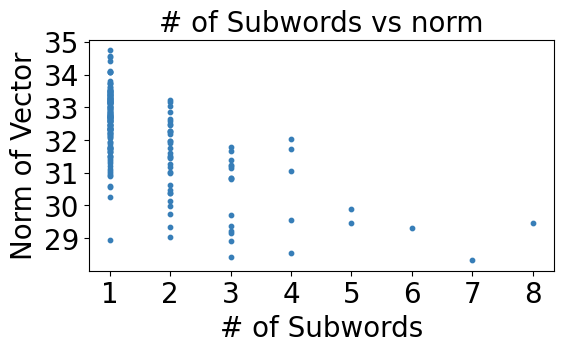

In [ ]:
calculate_norms_bert(bert_embeddings)

## DistilBERT norm

In [ ]:
# an example of subpiece tokenization
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
distilbert_tokenizer("Andorra")

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,


{'input_ids': [101, 1262, 27583, 102], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
# examples of names by subpieces
display(countries_data[countries_data['subpieces_distilbert'] < 4].groupby('subpieces_distilbert').mean())
display(countries_data[countries_data['subpieces_distilbert'] >= 4].mean(axis=0))

<ipython-input-143-582b97c58112>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(countries_data[countries_data['subpieces_distilbert'] < 4].groupby('subpieces_distilbert').mean())


,Same,Match,Year,subpieces_bert,subpieces_gpt2,subpieces_t5,gdp,gdp_logged,freq,freq_logged
subpieces_distilbert,,,,,,,,,,
1,0.925373,1.00000,2019.0,1.0,2.358209,1.447761,430595.970149,11.177523,74881.514925,10.628626
2,0.750000,0.96875,2019.0,2.0,2.625000,2.687500,870701.593750,9.443195,68148.031250,9.419762
3,1.000000,1.00000,2019.0,3.0,3.800000,3.666667,34896.466667,8.339846,8711.000000,8.928281


<ipython-input-143-582b97c58112>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(countries_data[countries_data['subpieces_distilbert'] >= 4].mean(axis=0))


Same                        0.750000
Match                       0.666667
Year                     2019.000000
subpieces_bert              5.583333
subpieces_distilbert        5.583333
subpieces_gpt2              5.416667
subpieces_t5                6.000000
gdp                     14980.333333
gdp_logged                  8.169103
freq                     4308.916667
freq_logged                 7.686522
dtype: float64

In [ ]:
for features in [['freq_logged']]:
    Y = countries_data[['subpieces_distilbert']].values
    X = countries_data[features].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary(xname=['Constant'] + features, yname='Radius'))

                            OLS Regression Results                            
Dep. Variable:                 Radius   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     118.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.95e-22
Time:                        19:42:25   Log-Likelihood:                -272.30
No. Observations:                 193   AIC:                             548.6
Df Residuals:                     191   BIC:                             555.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Constant        7.1702      0.515     13.912      

In [ ]:
def process_embeddings_distillbert(word_embeddings_df):
    """
    Process word embeddings DataFrame by resetting index, removing sentence embeddings,
    lowercasing names, and creating a 'tokens' column.

    Args:
    - word_embeddings_df (DataFrame): DataFrame containing word embeddings.

    Returns:
    - DataFrame: Processed word embeddings DataFrame.
    """
    # Reset index of the DataFrame
    word_embeddings_df = word_embeddings_df.reset_index()

    # Remove sentence embeddings and keep only token embeddings
    word_embeddings_df = word_embeddings_df[list(range(4, 771)) + [1, 2]]

    # Lowercase the names in the DataFrame
    word_embeddings_df['name'] = word_embeddings_df[1].apply(lambda x: x.lower())

    # Create a 'tokens' column from the existing column 1538
    word_embeddings_df['tokens'] = word_embeddings_df[2]

    return word_embeddings_df

# Define the folder path
figure_path = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/figures/'

# Create the folder if it doesn't exist
os.makedirs(figure_path, exist_ok=True)

def calculate_norms_distilbert(word_embeddings):
    """
    Calculate norms of word embeddings, group by country, and plot a scatter plot.

    Args:
    - word_embeddings (DataFrame): DataFrame containing word embeddings.

    Returns:
    - None
    """
    word_embeddings['norm'] = np.sqrt(np.square(word_embeddings[range(4, 771)]).sum(axis=1))
    word_embeddings = word_embeddings.groupby(1).mean()
    word_embeddings = word_embeddings.reset_index()

    # Join word_embeddings with countries_data
    # word_embeddings = word_embeddings.set_index(1).join(countries_data.set_index('name'), how='inner')

    # Extract X and Y values for the scatter plot
    Y = word_embeddings[['norm']].values
    X = word_embeddings[['tokens']].values

    # Plotting
    plt.figure(figsize=(6, 3))
    plt.scatter(X, Y, s=10, color="#377eb8")
    plt.xlabel("# of Subwords", fontsize=20)
    plt.ylabel("Norm of Vector", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("# of Subwords vs norm", fontsize=20)

    # Save the plot (uncomment the following line to save the plot)
    # plt.savefig(figure_path + 'norm_vs_subpieces.pdf', bbox_inches='tight', dpi=600)

    # Print correlation between norms and subpieces
    print(word_embeddings[['norm', 'tokens']].corr("pearson"))

In [ ]:
distillbert_embeddings = process_embeddings_distillbert(distillbert)

<ipython-input-145-fe46cbd8259d>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  word_embeddings = word_embeddings.groupby(1).mean()


            norm    tokens
norm    1.000000  0.062498
tokens  0.062498  1.000000


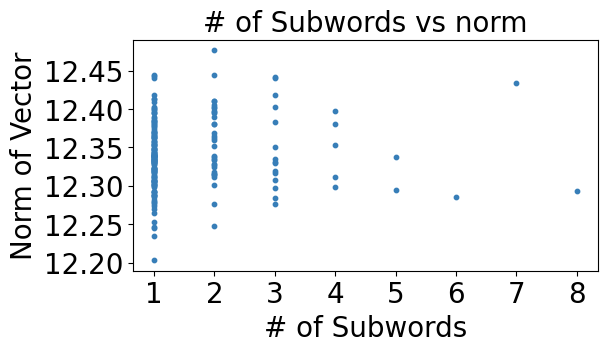

In [ ]:
calculate_norms_distilbert(distillbert_embeddings)

## GPT2 norm

In [ ]:
for features in [['freq_logged']]:
    Y = countries_data[['subpieces_gpt2']].values
    X = countries_data[features].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary(xname=['Constant'] + features, yname='Radius'))

                            OLS Regression Results                            
Dep. Variable:                 Radius   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.66e-21
Time:                        19:42:38   Log-Likelihood:                -268.95
No. Observations:                 193   AIC:                             541.9
Df Residuals:                     191   BIC:                             548.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Constant        8.0418      0.507     15.875      

In [ ]:
def process_embeddings_gpt2(word_embeddings_df):
    """
    Process word embeddings DataFrame by resetting index, removing sentence embeddings,
    lowercasing names, and creating a 'tokens' column.

    Args:
    - word_embeddings_df (DataFrame): DataFrame containing word embeddings.

    Returns:
    - DataFrame: Processed word embeddings DataFrame.
    """
    # Reset index of the DataFrame
    word_embeddings_df = word_embeddings_df.reset_index()

    # Remove sentence embeddings and keep only token embeddings
    word_embeddings_df = word_embeddings_df[list(range(3, 771)) + [1, 2]]

    # Lowercase the names in the DataFrame
    word_embeddings_df[1537] = word_embeddings_df[1].apply(lambda x: x.lower())

    # Create a 'tokens' column from the existing column 1538
    word_embeddings_df['tokens'] = word_embeddings_df[2]

    return word_embeddings_df


# Process average embeddings
average_embeddings_gpt2 = process_embeddings_gpt2(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/gpt2_test.csv", header=None))

In [ ]:
# Define the folder path
folder_path = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/test_figures/'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

def calculate_norms_gpt2(word_embeddings):
    """
    Calculate norms of word embeddings, group by country, and plot a scatter plot.

    Args:
    - word_embeddings (DataFrame): DataFrame containing word embeddings.

    Returns:
    - None
    """
    word_embeddings['norm'] = np.sqrt(np.square(word_embeddings[range(3, 771)]).sum(axis=1))
    word_embeddings = word_embeddings.groupby(1537).mean()
    word_embeddings = word_embeddings.reset_index()

    # Join word_embeddings with countries_data
    word_embeddings = word_embeddings.set_index(1537).join(countries_data.set_index('name'), how='inner')

    # Extract X and Y values for the scatter plot
    Y = word_embeddings[['norm']].values
    X = word_embeddings[['subpieces_gpt2']].values

    # Plotting
    plt.figure(figsize=(6, 3))
    plt.scatter(X, Y, s=10, color="#377eb8")
    plt.xlabel("# of Subwords", fontsize=20)
    plt.ylabel("Norm of Vector", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("# of Subwords vs norm", fontsize=20)

    # Save the plot (uncomment the following line to save the plot)
    plt.savefig(folder_path + 'norm_vs_subpieces.pdf', bbox_inches='tight', dpi=600)

    # Print correlation between norms and subpieces
    print(word_embeddings[['norm', 'subpieces_gpt2']].corr("pearson"))

<ipython-input-150-06f9265131d0>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  word_embeddings = word_embeddings.groupby(1537).mean()


                    norm  subpieces_gpt2
norm            1.000000       -0.059108
subpieces_gpt2 -0.059108        1.000000


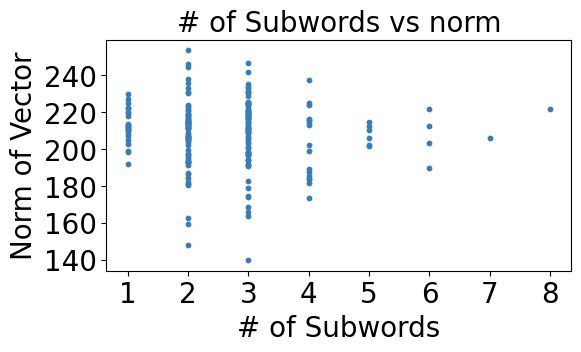

In [ ]:
calculate_norms_gpt2(average_embeddings_gpt2)

## T5 norm

In [ ]:
for features in [['freq_logged']]:
    Y = countries_data[['subpieces_t5']].values
    X = countries_data[features].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary(xname=['Constant'] + features, yname='Radius'))

                            OLS Regression Results                            
Dep. Variable:                 Radius   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.25e-26
Time:                        19:42:52   Log-Likelihood:                -308.35
No. Observations:                 193   AIC:                             620.7
Df Residuals:                     191   BIC:                             627.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Constant        9.6800      0.621     15.581      

In [ ]:
def process_embeddings_t5(word_embeddings_df):
    """
    Process word embeddings DataFrame by resetting index, removing sentence embeddings,
    lowercasing names, and creating a 'tokens' column.

    Args:
    - word_embeddings_df (DataFrame): DataFrame containing word embeddings.

    Returns:
    - DataFrame: Processed word embeddings DataFrame.
    """
    # Reset index of the DataFrame
    word_embeddings_df = word_embeddings_df.reset_index()

    # Remove sentence embeddings and keep only token embeddings
    word_embeddings_df = word_embeddings_df[list(range(3, 771)) + [1, 2]]

    # Lowercase the names in the DataFrame
    word_embeddings_df['name'] = word_embeddings_df[1].apply(lambda x: x.lower())

    # Create a 'tokens' column from the existing column 1538
    word_embeddings_df['tokens'] = word_embeddings_df[2]

    return word_embeddings_df

# Define the folder path
figure_path = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/figures/'

# Create the folder if it doesn't exist
os.makedirs(figure_path, exist_ok=True)

def calculate_norms_t5(word_embeddings):
    """
    Calculate norms of word embeddings, group by country, and plot a scatter plot.

    Args:
    - word_embeddings (DataFrame): DataFrame containing word embeddings.

    Returns:
    - None
    """
    word_embeddings['norm'] = np.sqrt(np.square(word_embeddings[range(3, 771)]).sum(axis=1))
    word_embeddings = word_embeddings.groupby(1).mean()
    word_embeddings = word_embeddings.reset_index()

    # Join word_embeddings with countries_data
    # word_embeddings = word_embeddings.set_index(1).join(countries_data.set_index('name'), how='inner')

    # Extract X and Y values for the scatter plot
    Y = word_embeddings[['norm']].values
    X = word_embeddings[['tokens']].values

    # Plotting
    plt.figure(figsize=(6, 3))
    plt.scatter(X, Y, s=10, color="#377eb8")
    plt.xlabel("# of Subwords", fontsize=20)
    plt.ylabel("Norm of Vector", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("# of Subwords vs norm", fontsize=20)

    # Save the plot (uncomment the following line to save the plot)
    # plt.savefig(figure_path + 'norm_vs_subpieces.pdf', bbox_inches='tight', dpi=600)

    # Print correlation between norms and subpieces
    print(word_embeddings[['norm', 'tokens']].corr("pearson"))

In [ ]:
average_embeddings_t5 = process_embeddings_t5(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/t5_test.csv", header=None))

<ipython-input-153-55a0d9b59ef8>:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  word_embeddings = word_embeddings.groupby(1).mean()


            norm    tokens
norm    1.000000 -0.869109
tokens -0.869109  1.000000


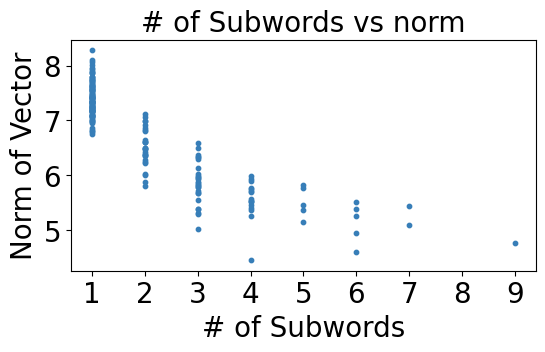

In [ ]:
calculate_norms_t5(average_embeddings_t5)

# **Semantic Similarities**

In [ ]:
def analyze_semantic_distinctiveness(df, n=3):
    country_names = countries_data['name']
    embeddings = df.iloc[:, 3:].to_numpy()

    # Normalize embeddings
    norm_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Calculate average cosine similarity for each country
    avg_similarities = {}
    for i, country in enumerate(country_names):
        similarities = cosine_similarity([norm_embeddings[i]], norm_embeddings)[0]
        avg_similarity = (np.sum(similarities) - 1) / (len(country_names) - 1)
        avg_similarities[country] = avg_similarity

    # Load country frequencies
    country_frequencies = {}
    for index, row in countries_data.iterrows():
        country_frequencies[row['name']] = row['freq']

    # Correlate frequencies with average similarities
    frequencies = np.array([country_frequencies[country] for country in country_names])
    similarities = np.array([avg_similarities[country] for country in country_names])

    # Perform statistical analysis (e.g., Pearson correlation)
    correlation = np.corrcoef(frequencies, similarities)
    print(f"Correlation coefficient: {correlation[0, 1]}")

    # Visualization
    largest_indices = np.argpartition(frequencies, -n)[-n:]
    combined_metric = -frequencies + similarities
    smallest_indices = np.argpartition(combined_metric, -n)[-n:]

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=frequencies, y=similarities, color='blue', edgecolor='none')
    texts = []
    for index in largest_indices:
        plt.scatter(frequencies[index], similarities[index], color='red')
        texts.append(plt.text(frequencies[index], similarities[index], country_names.iloc[index],
                              fontsize=9, weight='bold', color='black',
                              ha='center', va='center',
                              bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', linewidth=1)))
    plt.xlabel('Frequency of Country Names')
    plt.ylabel('Average Semantic Similarity')
    plt.title('Frequency vs. Semantic Distinctiveness for Larger Countries')
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
    plt.show()

    # Second Plot for smaller countries
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=frequencies, y=similarities, color='blue', edgecolor='none')
    texts = []
    for index in smallest_indices:
        plt.scatter(frequencies[index], similarities[index], color='green')
        texts.append(plt.text(frequencies[index], similarities[index], country_names.iloc[index],
                              fontsize=9, weight='bold', color='black',
                              ha='center', va='center',
                              bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', linewidth=1)))
    plt.xlabel('Frequency of Country Names')
    plt.ylabel('Average Semantic Similarity')
    plt.title('Frequency vs. Semantic Distinctiveness for Smaller Countries')
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
    plt.show()

Correlation coefficient: -0.02850272113623554


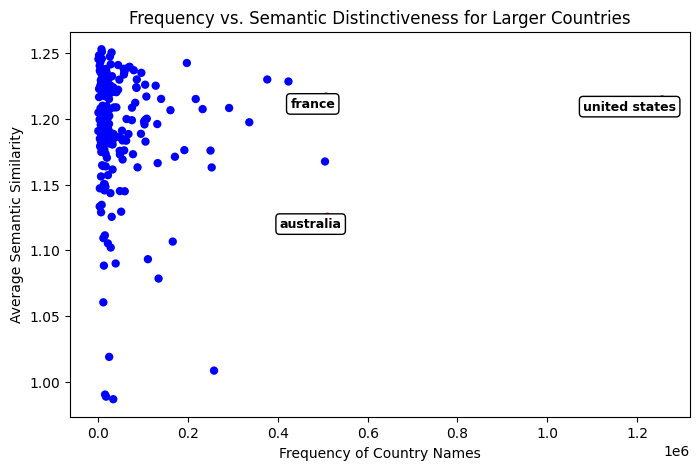

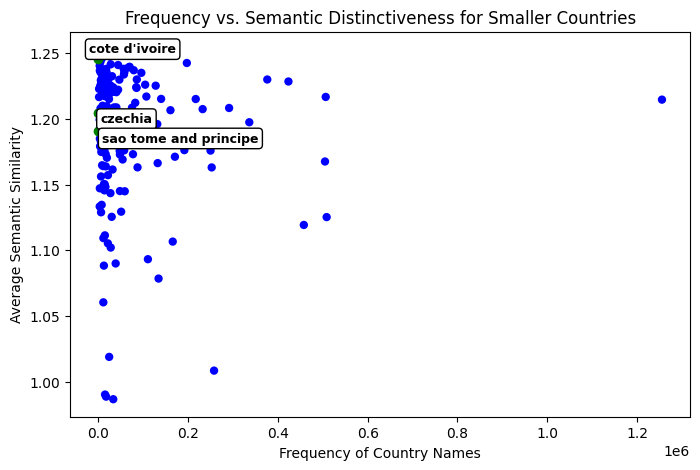

In [ ]:
analyze_semantic_distinctiveness(bert)

Correlation coefficient: 0.09979480761785228


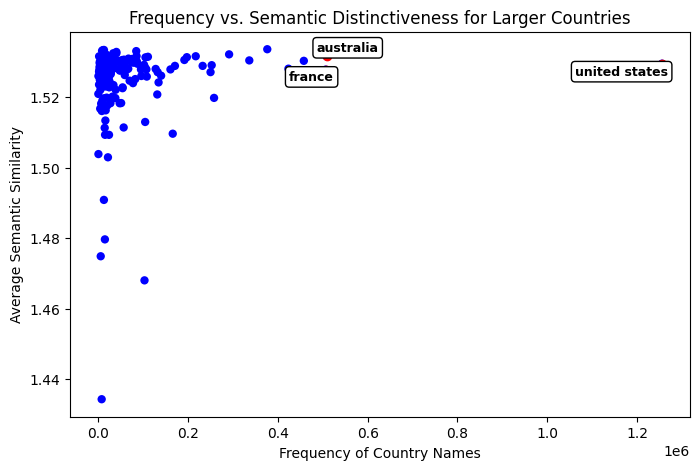

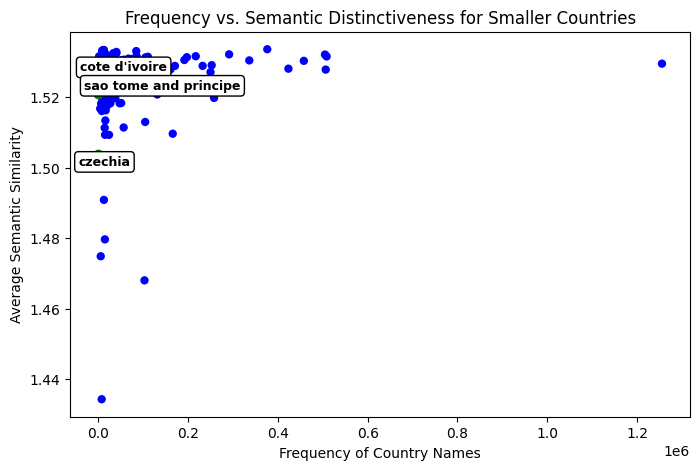

In [ ]:
analyze_semantic_distinctiveness(distillbert)

Correlation coefficient: 0.04436795577108138


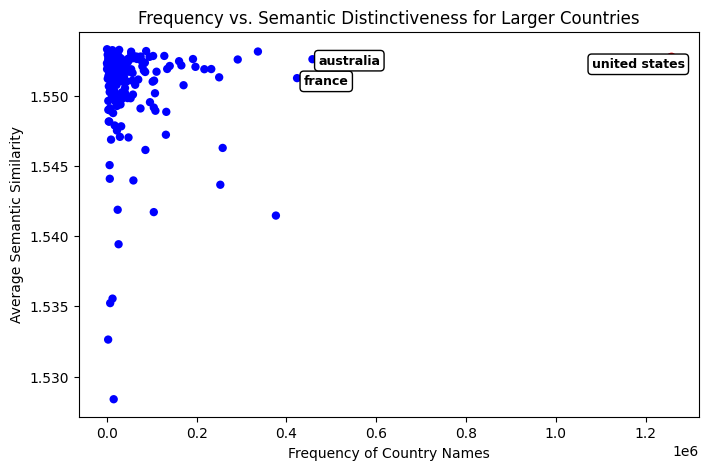

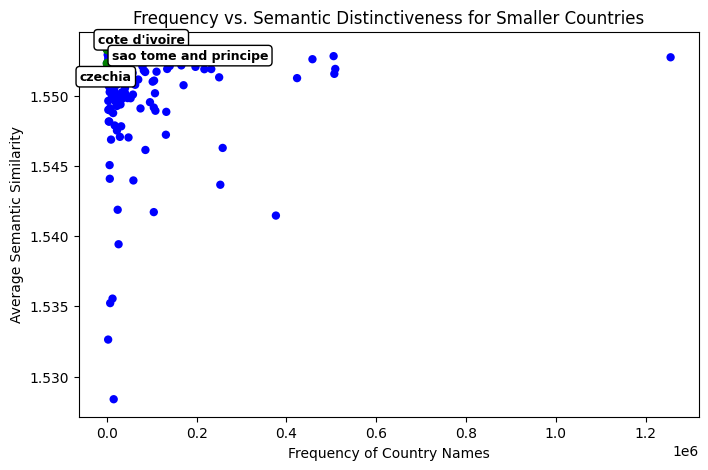

In [ ]:
analyze_semantic_distinctiveness(gpt_res)

Correlation coefficient: -0.0855290792143581


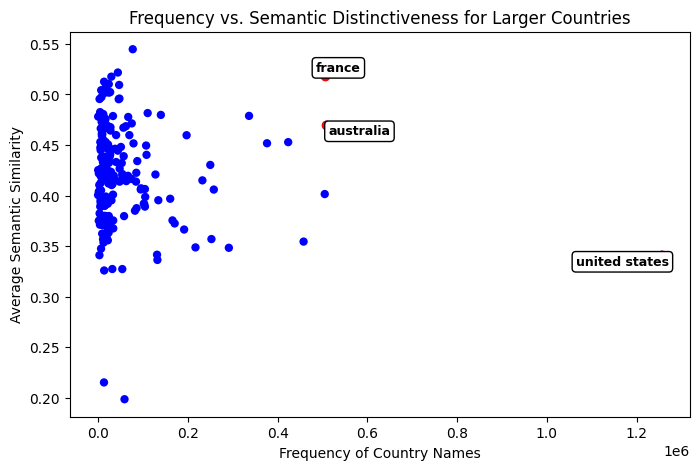

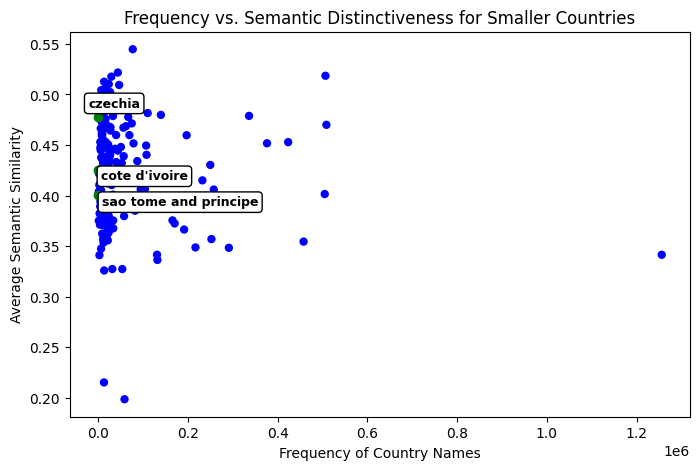

In [ ]:
analyze_semantic_distinctiveness(t5)

In [ ]:
def select_with_offset(sorted_list, n=2, offset=1, reverse=False):
    if reverse:
        # For reverse selection with an offset
        if n == 1:
            selected_items = sorted_list[-(n + offset):-offset]
        else:
            selected_items = sorted_list[-(n + offset + 1):-offset + 1]
    else:
        # For forward selection with an offset
        selected_items = sorted_list[offset:n + offset]

    return selected_items

def analyze_semantic_distinctiveness_examples(df, model_name, n=1):
    country_names = countries_data['name']
    embeddings = df.iloc[:, 3:].to_numpy()

    # Normalize embeddings
    norm_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Calculate average cosine similarity for each country
    avg_similarities = {}
    for i, country in enumerate(country_names):
        similarities = cosine_similarity([norm_embeddings[i]], norm_embeddings)[0]
        avg_similarity = (np.sum(similarities) - 1) / (len(country_names) - 1)
        avg_similarities[country] = avg_similarity

    # Load country frequencies
    country_frequencies = {}
    for index, row in countries_data.iterrows():
        country_frequencies[row['name']] = row['freq']

    # Correlate frequencies with average similarities
    frequencies = np.array([country_frequencies[country] for country in country_names])
    similarities = np.array([avg_similarities[country] for country in country_names])

    # Sort countries by average similarity
    sorted_countries = sorted(avg_similarities.items(), key=lambda item: item[1], reverse=True)

    # Extract highest and lowest n semantic similar countries
    offset = 1
    if model_name == 't5':
        offset = 3
    elif model_name == "gpt2":
        offset = 5
    highest_similarity_countries = select_with_offset(sorted_countries, n, offset, reverse=False)
    lowest_similarity_countries = select_with_offset(sorted_countries, n, offset, reverse=True)

    plt.figure(figsize=(8, 5))
    for country, similarity in highest_similarity_countries + lowest_similarity_countries:
        sns.scatterplot(x=[country_frequencies[country]], y=[similarity], s=100, label=f"{country} (similarity: {similarity:.2f})")

    plt.xlabel('Frequency of Country Names')
    plt.ylabel('Average Semantic Similarity')
    plt.title('Countries with Highest and Lowest Semantic Similarities')

    # Improve plot readability
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

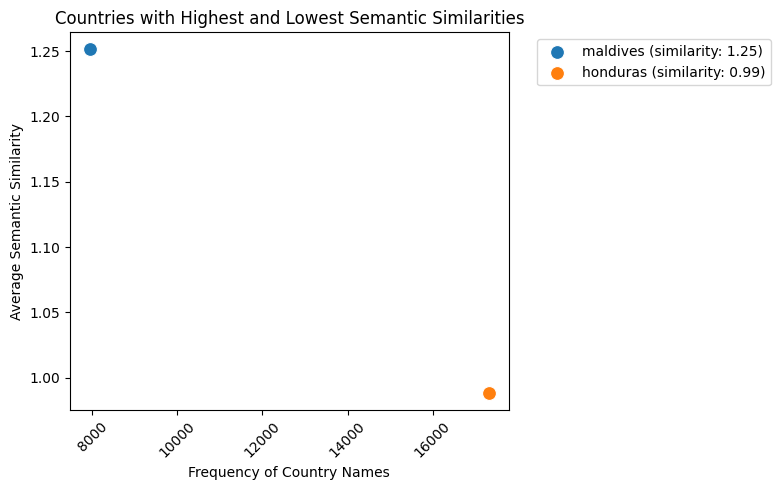

In [ ]:
analyze_semantic_distinctiveness_examples(bert, "bert")

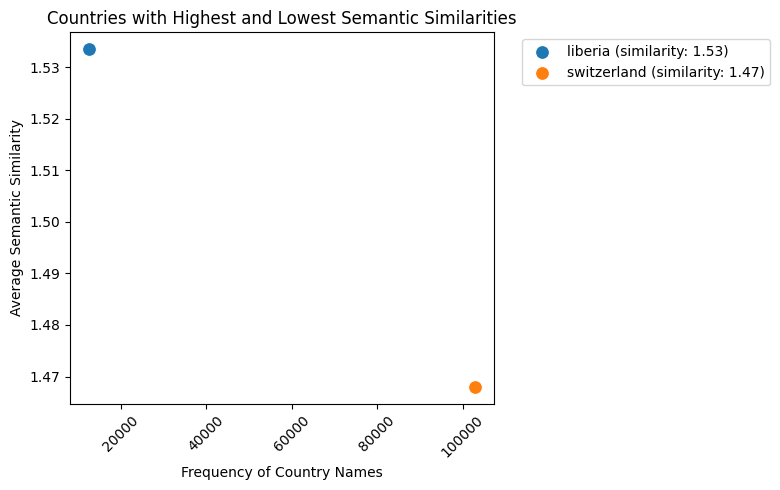

In [ ]:
analyze_semantic_distinctiveness_examples(distillbert, "distillbert")

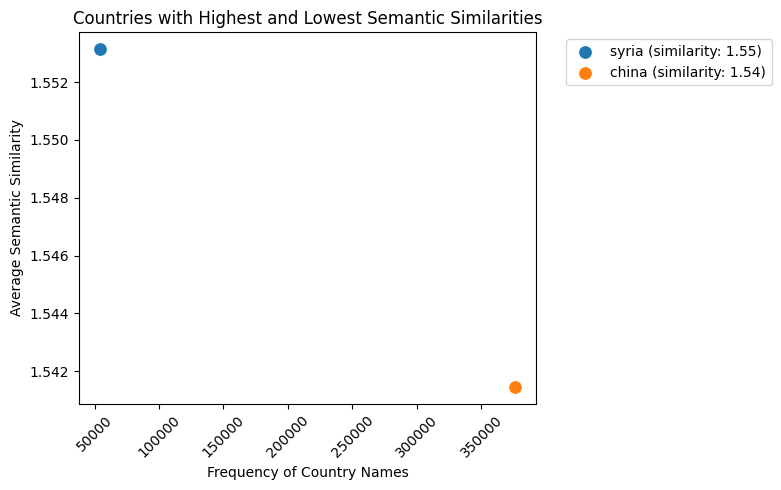

In [ ]:
analyze_semantic_distinctiveness_examples(gpt_res, "gpt2")

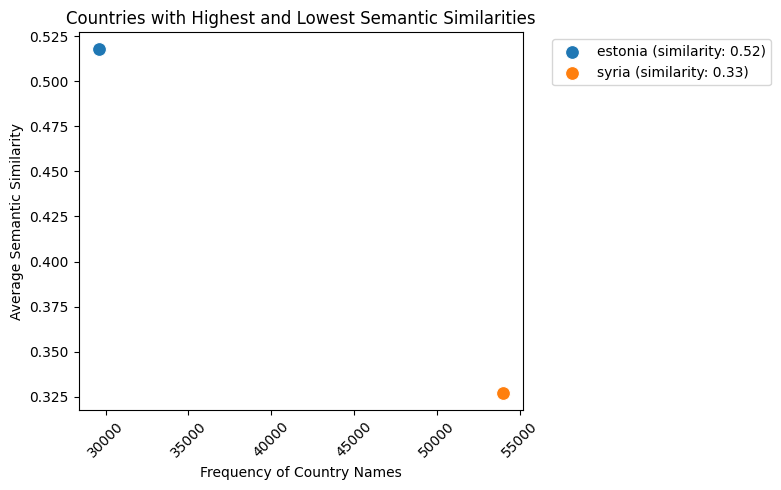

In [ ]:
analyze_semantic_distinctiveness_examples(t5, "t5")

In [ ]:
def analyze_gdp_vs_semantic_similarity_with_line(df, n=4):
    country_names = countries_data['name']
    embeddings = df.iloc[:, 3:].to_numpy()

    # Normalize embeddings
    norm_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Calculate average cosine similarity for each country
    avg_similarities = {}
    for i, country in enumerate(country_names):
        similarities = cosine_similarity([norm_embeddings[i]], norm_embeddings)[0]
        avg_similarity = (np.sum(similarities) - 1) / (len(country_names) - 1)
        avg_similarities[country] = avg_similarity

    # Load GDP for each country
    country_gdp = countries_data.set_index('name')['gdp'].to_dict()

    # Prepare data for correlation and visualization
    gdps = np.array([country_gdp[country] for country in country_names])
    similarities = np.array([avg_similarities[country] for country in country_names])

    # Correlate GDP with average similarities
    correlation = np.corrcoef(gdps, similarities)
    print(f"Correlation coefficient between GDP and Semantic Similarity: {correlation[0, 1]}")

    # Fit a line to the data
    log_gdps = np.log(gdps)  # Taking log of GDP for a linear fit on a log scale
    coefficients = np.polyfit(log_gdps, similarities, 1)
    polynomial = np.poly1d(coefficients)
    fit_line = polynomial(log_gdps)

    # Visualization
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=log_gdps, y=similarities, color='blue', edgecolor='none')
    plt.plot(log_gdps, fit_line, color='red', label='Best-fit line')
    plt.xlabel('Log of GDP')
    plt.ylabel('Average Semantic Similarity')
    plt.title('GDP vs. Semantic Similarity')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import pearsonr

def analyze_gdp_vs_semantic_similarity_with_p_value(df):
    country_names = countries_data['name']
    embeddings = df.iloc[:, 3:].to_numpy()

    # Normalize embeddings
    norm_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Calculate average cosine similarity for each country
    avg_similarities = {}
    for i, country in enumerate(country_names):
        similarities = cosine_similarity([norm_embeddings[i]], norm_embeddings)[0]
        avg_similarity = (np.sum(similarities) - 1) / (len(country_names) - 1)
        avg_similarities[country] = avg_similarity

    # Load GDP for each country
    country_gdp = countries_data.set_index('name')['gdp'].to_dict()

    # Prepare data for correlation and visualization
    gdps = np.array([country_gdp[country] for country in country_names])
    similarities = np.array([avg_similarities[country] for country in country_names])

    # Correlate GDP with average similarities using pearsonr to get the p-value
    correlation, p_value = pearsonr(gdps, similarities)
    print(f"Correlation coefficient: {correlation}")
    print(f"P-value: {p_value}")

Correlation coefficient between GDP and Semantic Similarity: 0.05121424550564911


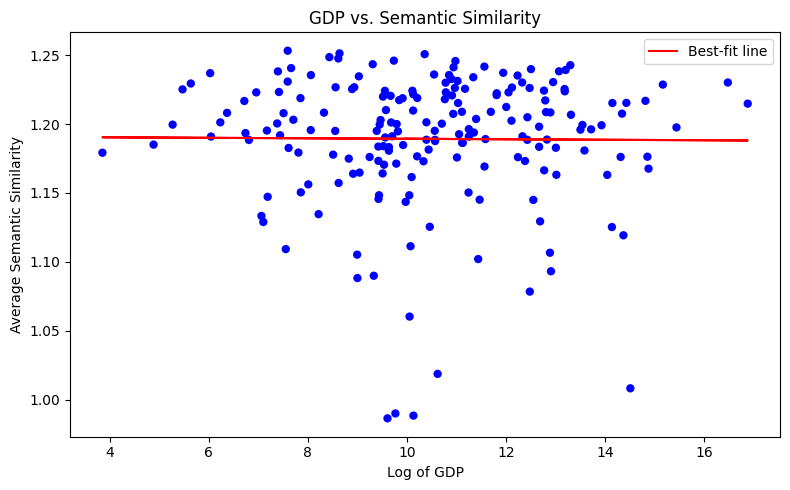

Correlation coefficient between GDP and Semantic Similarity: 0.07072208104289053


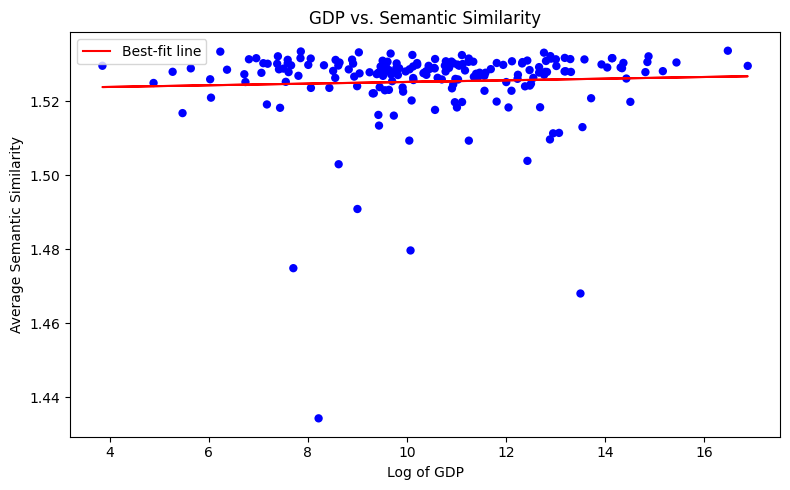

Correlation coefficient between GDP and Semantic Similarity: -0.04291221138490699


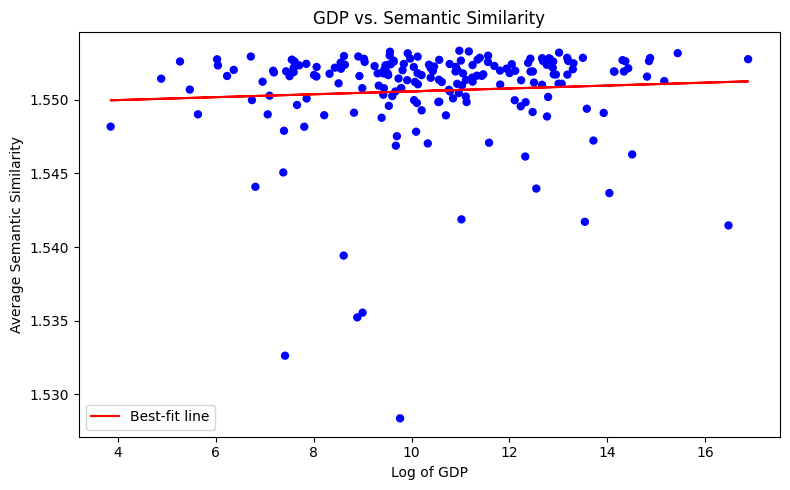

Correlation coefficient between GDP and Semantic Similarity: -0.05857733563004291


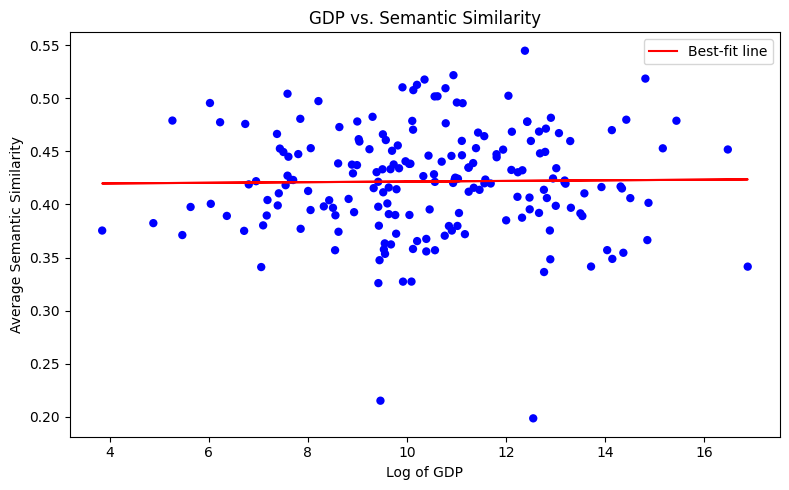

In [ ]:
analyze_gdp_vs_semantic_similarity_with_line(bert)
analyze_gdp_vs_semantic_similarity_with_line(distillbert)
analyze_gdp_vs_semantic_similarity_with_line(gpt_res)
analyze_gdp_vs_semantic_similarity_with_line(t5)

In [ ]:
analyze_gdp_vs_semantic_similarity_with_p_value(bert)
analyze_gdp_vs_semantic_similarity_with_p_value(distillbert)
analyze_gdp_vs_semantic_similarity_with_p_value(gpt_res)
analyze_gdp_vs_semantic_similarity_with_p_value(t5)

Correlation coefficient: 0.05121424550564906
P-value: 0.47935924804428703
Correlation coefficient: 0.07072208104289045
P-value: 0.3283986152895543
Correlation coefficient: -0.04291221138490692
P-value: 0.5534784166701033
Correlation coefficient: -0.058577335630042866
P-value: 0.4184052327491159


In [ ]:
from scipy.stats import zscore

def analyze_semantic_distinctiveness_combined_metric(df, weights={'gdp': 0.4, 'freq': 0.6}):
    country_names = countries_data['name'].values
    embeddings = df.iloc[:, 3:].to_numpy()

    # Normalize embeddings
    norm_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

    # Calculate average cosine similarity for each country
    avg_similarities = {}
    for i, country in enumerate(country_names):
        similarities = cosine_similarity([norm_embeddings[i]], norm_embeddings)[0]
        avg_similarity = (np.sum(similarities) - 1) / (len(country_names) - 1)  # Exclude self-similarity
        avg_similarities[country] = avg_similarity

    # Normalize GDP and Frequency
    gdps = countries_data['gdp'].values
    frequencies = countries_data['freq'].values
    normalized_gdp = zscore(gdps)
    normalized_freq = zscore(frequencies)

    # Combine GDP and Frequency into a single metric with weights
    combined_metric = weights['gdp'] * normalized_gdp + weights['freq'] * normalized_freq

    # Visualization
    semantic_similarities = np.array([avg_similarities[country] for country in country_names])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=combined_metric, y=semantic_similarities)  # Corrected here

    plt.xlabel('Combined Metric (Weighted Normalized GDP and Frequency)')
    plt.ylabel('Average Semantic Similarity')
    plt.title('Semantic Similarity vs. Combined Metric of GDP and Frequency')
    plt.grid(True)
    plt.show()

    # You might want to return or print additional statistics, like correlation coefficients.
    correlation = np.corrcoef(combined_metric, semantic_similarities)[0, 1]
    print(f"Correlation coefficient: {correlation}")

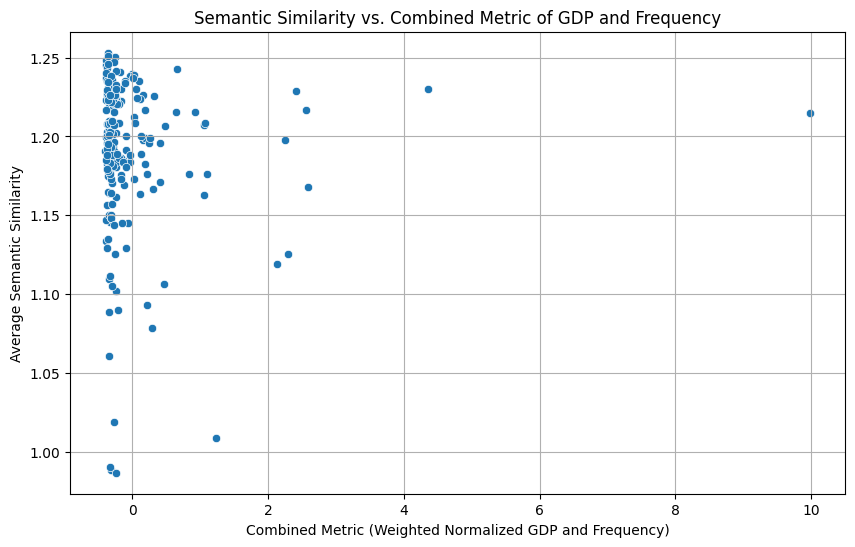

Correlation coefficient: 0.0035437266493423725


In [ ]:
analyze_semantic_distinctiveness_combined_metric(bert)

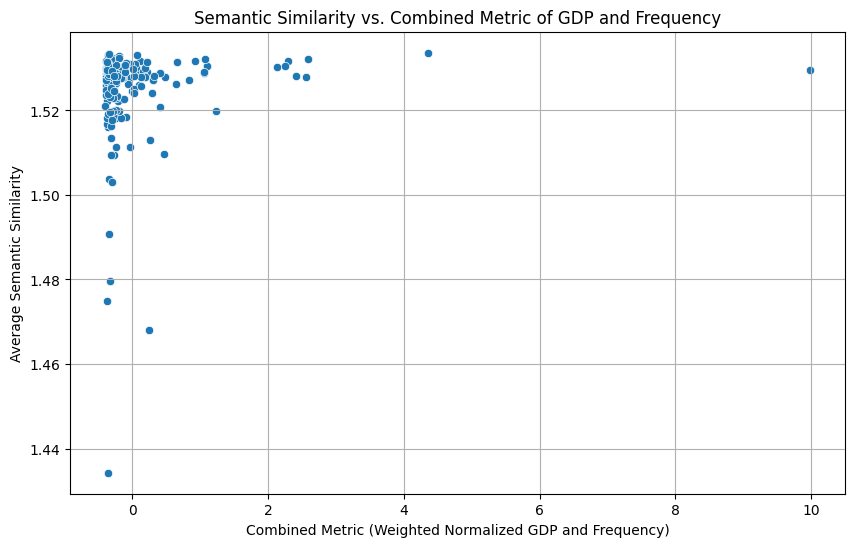

Correlation coefficient: 0.09232539942088065


In [ ]:
analyze_semantic_distinctiveness_combined_metric(distillbert)

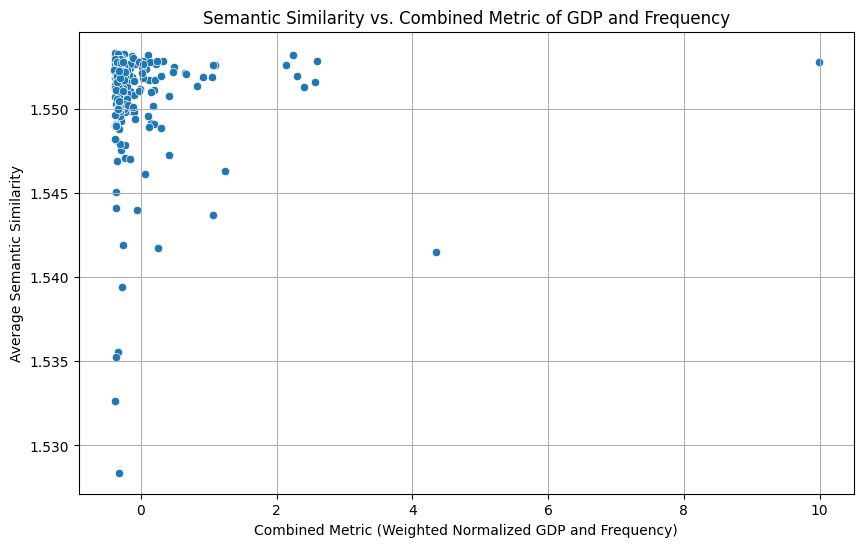

Correlation coefficient: 0.00990202031129686


In [ ]:
analyze_semantic_distinctiveness_combined_metric(gpt_res)

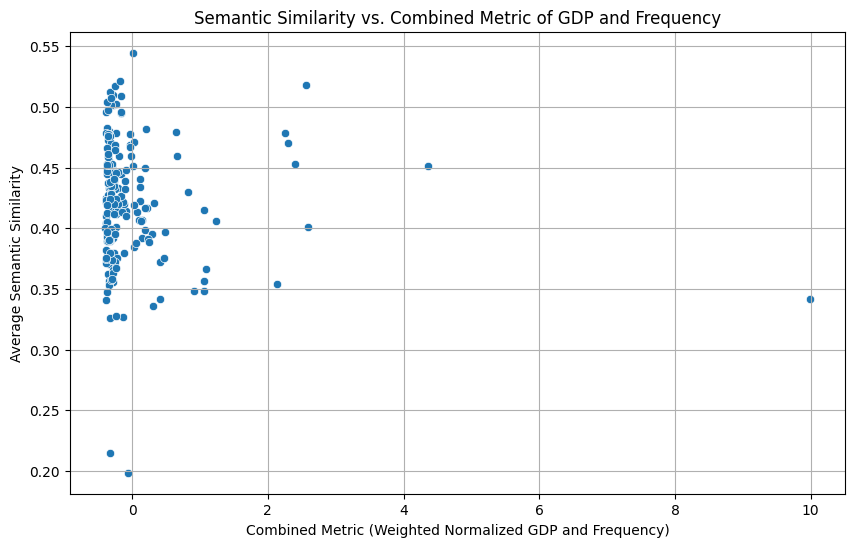

Correlation coefficient: -0.07827503070054996


In [ ]:
analyze_semantic_distinctiveness_combined_metric(t5)

# **MLM Tasks**